# Simple Linear Regression Study
---

## Author:
[__Gleisson Bispo__](https://github.com/gleissonbispo)


## Hypothesis:
Understand the influence of the **age** in the US Personal Health Care Price


## Dataset:
__[Kaggle: US Medical Cost Personal](https://www.kaggle.com/mirichoi0218/insurance)__

---

<img src=http://www.clinicachrisostomo.com.br//_files/blogpost/133/5c192f9ad8444.jpg width=700>

__<center> Let's go! </center>__

---

## Importing Libraries and Reading Data

In [95]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading CSV
df_insurance = pd.read_csv(r'data/insurance.csv')
df_insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#DF key information
df_insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Visualizing the  features

In [49]:
df_age_price = df_insurance[['age', 'charges']]
df_age_price.head()


,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


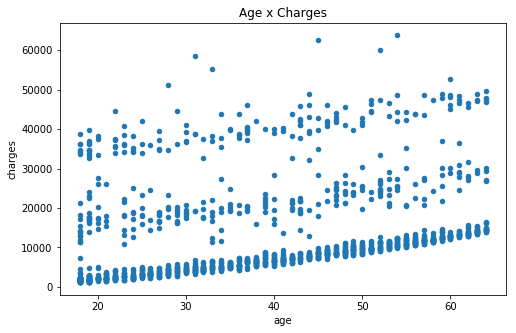

In [57]:
#Scatter plot
df_age_price.plot(x='age', 
                  y='charges', 
                  kind='scatter',
                  figsize=(8,5), 
                  title='Age x Charges')
plt.show()


## Correlation between features

In [47]:
#Correlation
df_age_price.corr()


,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


## Features distribution

### Age

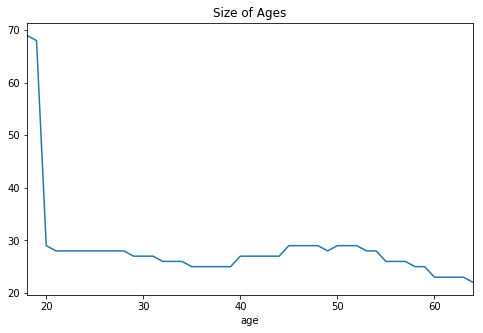

In [63]:
#Size of each age on the distribution
df_age_price.groupby('age')['charges'].size().plot(figsize=(8,5),
                                                   title='Size of Ages')
plt.show()


### Charges

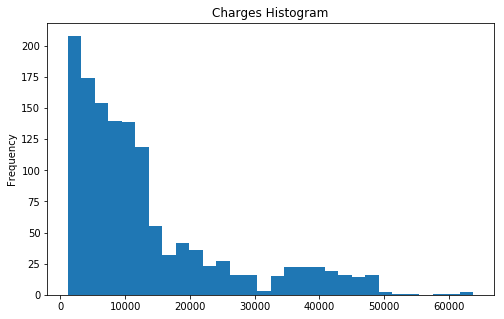

[]

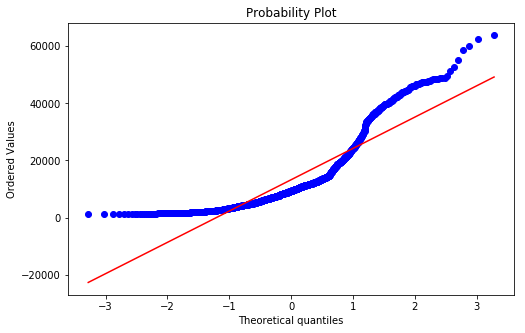

In [76]:
#Charges Distribution
df_age_price['charges'].plot(kind='hist', 
                             bins=30, 
                             title='Charges Histogram', 
                             figsize=(8,5))
plt.show()

#Normal probability plot
plt.figure(figsize=(8,5))
st.probplot(df_age_price['charges'], 
            plot=plt)
plt.plot()


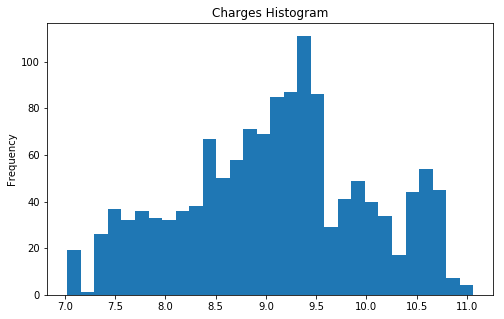

[]

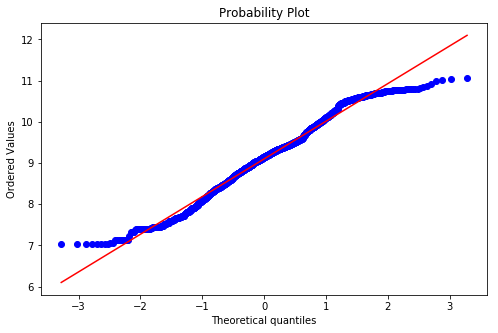

In [80]:
#Using log1p to normalize the distribution
df_age_price['log_charges'] = np.log1p(df_age_price['charges'])

#Log Charges Distribution
df_age_price['log_charges'].plot(kind='hist', 
                             bins=30, 
                             title='Charges Histogram', 
                             figsize=(8,5))
plt.show()

#Normal probability plot
plt.figure(figsize=(8,5))
st.probplot(df_age_price['log_charges'], 
            plot=plt)
plt.plot()

## Simple Linear Regression

### Regression using StatsModel

In [94]:
model = smf.ols('log_charges ~ age', df_age_price).fit()
print(model.summary2())


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.278    
Dependent Variable: log_charges      AIC:                3138.2401
Date:               2019-05-02 22:21 BIC:                3148.6380
No. Observations:   1338             Log-Likelihood:     -1567.1  
Df Model:           1                F-statistic:        515.9    
Df Residuals:       1336             Prob (F-statistic): 7.68e-97 
R-squared:          0.279            Scale:              0.61024  
--------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept    7.7447     0.0633   122.2966   0.0000   7.6205   7.8689
age          0.0345     0.0015    22.7135   0.0000   0.0316   0.0375
------------------------------------------------------------------
Omnibus:             179.316       Durbin-Watson:          2.029  
Pro

### Regression using Sklearn

In [118]:
model1 = LinearRegression(fit_intercept=True)
model1.fit(df_age_price['age'][:, np.newaxis], df_age_price['log_charges'])

print("Intercept - beta 0: ", model1.intercept_)
print("Age - beta 1: ", model1.coef_[0])


Intercept - beta 0:  7.744702570708041
Age - beta 1:  0.03453782570149494


In [119]:
print("R^2: ", model1.score(df_age_price['age'][:, np.newaxis], df_age_price['log_charges']))


R^2:  0.2785806129223686


### Regression using Scipy.Stats.Linregress

In [122]:
beta1, beta0, rsquare, pvalue, std =  st.linregress(df_age_price['age'], df_age_price['log_charges'])

print("Intercept - beta 0: ", beta0)
print("Age - beta 1: ", beta1)
print("R^2: ", rsquare**2)


Intercept - beta 0:  7.744702570708041
Age - beta 1:  0.03453782570149494
R^2:  0.27858061292236863


### Regression plot

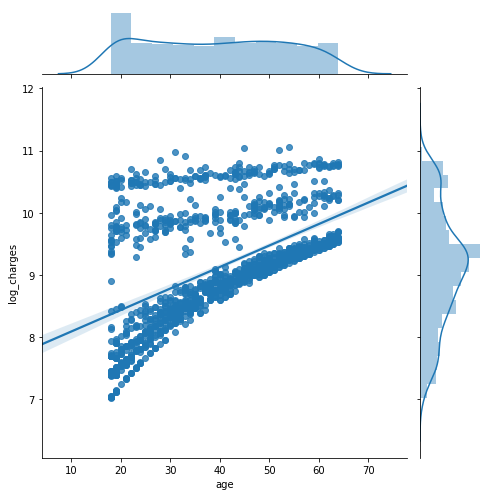

In [150]:
sns.jointplot(x="age", 
              y="log_charges", 
              data=df_age_price, 
              kind='reg', 
              height=7)
plt.show()

## Analysing Results

Using a simple linear regression considering Charges and age, based on that DataSet we can affirm that **Each Age Unity** improves a 3.45% rate on the Charges of US Personal Health Care Plan!

The equation that best represents the solution is: <img src="https://latex.codecogs.com/gif.latex?Charge(Age)&space;=&space;0.03453(Age)&space;&plus;&space;7.74" />